# Product Recommendation Using Collaborative Filtering

###             Build a recommendation system to recommend  the products to customers based on the their previous ratings for other products.

# Load the Data Set


In [1]:
#importing the libraries thats we want

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
# Here, I take the BigBasket Dataset (Online Grocery Store)

df= pd.read_csv('BigBasket Products.csv')

In [3]:
# Printing the number of rows & columns in Bigbasket Dataset

rows_count, columns_count = df.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 27555
Total Number of columns : 12


In [4]:
# Display the Bigbasket dataset

df.head()

,index,product_id,product_name,category,sub_category,brand,sale_price,market_price,type,user_id,rating,description
0,1,100001,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,2,4.1,This Product contains Garlic Oil that is known...
1,2,100002,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,8,2.3,"Each product is microwave safe (without lid), ..."
2,3,100003,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,11400,3.4,"A perfect gift for all occasions, be it your m..."
3,4,100004,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",11676,3.7,Multipurpose container with an attractive desi...
4,5,100005,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,41385,4.4,Nivea Creme Soft Soap gives your skin the best...


# Data Cleaning

### It involves filling of missing values, smoothing or removing noisy data and outliers along with resolving inconsistencies.

In [5]:
# Information about the dataset

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product_id    27555 non-null  int64  
 2   product_name  27554 non-null  object 
 3   category      27555 non-null  object 
 4   sub_category  27555 non-null  object 
 5   brand         27554 non-null  object 
 6   sale_price    27555 non-null  float64
 7   market_price  27555 non-null  float64
 8   type          27555 non-null  object 
 9   user_id       27555 non-null  int64  
 10  rating        18929 non-null  float64
 11  description   27440 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 2.5+ MB
None


In [6]:
# Finding the null values Presented in the each column and Calculating the null values for each column

df.isnull().sum()

index              0
product_id         0
product_name       1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
user_id            0
rating          8626
description      115
dtype: int64

In [7]:
# Here, we dropping the null value from the dataset

new = df.dropna()

In [8]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18840 entries, 0 to 27554
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         18840 non-null  int64  
 1   product_id    18840 non-null  int64  
 2   product_name  18840 non-null  object 
 3   category      18840 non-null  object 
 4   sub_category  18840 non-null  object 
 5   brand         18840 non-null  object 
 6   sale_price    18840 non-null  float64
 7   market_price  18840 non-null  float64
 8   type          18840 non-null  object 
 9   user_id       18840 non-null  int64  
 10  rating        18840 non-null  float64
 11  description   18840 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.9+ MB


# Dimensionality Reduction

### The number of input features, variables, or columns present in a given dataset is known as dimensionality, and the process to reduce these features is called dimensionality reduction.

In [9]:
# Now, we removing the unwanted column.

var = ['index','sub_category', 'brand', 'type','description']
new = new.drop(var, axis='columns')

In [10]:
# Displaying the dataset after removed some columns.

new.head()

,product_id,product_name,category,sale_price,market_price,user_id,rating
0,100001,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,220.0,220.0,2,4.1
1,100002,Water Bottle - Orange,"Kitchen, Garden & Pets",180.0,180.0,8,2.3
2,100003,"Brass Angle Deep - Plain, No.2",Cleaning & Household,119.0,250.0,11400,3.4
3,100004,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,149.0,176.0,11676,3.7
4,100005,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,162.0,162.0,41385,4.4


In [11]:
#Checking the dataset it has null value or not.
new.isnull().sum()

product_id      0
product_name    0
category        0
sale_price      0
market_price    0
user_id         0
rating          0
dtype: int64

In [12]:
# After cleaned dataset printing the no. of rows and columns.
rows_count, columns_count = new.shape
print('Total Number of rows :', rows_count)
print('Total Number of columns :', columns_count)

Total Number of rows : 18840
Total Number of columns : 7


In [13]:
# Now, Send the preprocessed dataset to create a new cleaned dataset.
# new.to_csv('Cleaned Dataset of Bigbasket.csv') 

# Exploratory Data Analysis

### Visualizing the Data Set to Choose the Model or Algorithm


In [14]:
#now i opening the cleaned dataset
cleaned = pd.read_csv("Cleaned Dataset of Bigbasket.csv")

In [15]:
cleaned.head()

,Unnamed: 0,product_id,product_name,category,sale_price,market_price,user_id,rating,Rate
0,0,100001,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,220.0,220.0,2,4.1,4
1,1,100002,Water Bottle - Orange,"Kitchen, Garden & Pets",180.0,180.0,8,2.3,2
2,2,100003,"Brass Angle Deep - Plain, No.2",Cleaning & Household,119.0,250.0,11400,3.4,3
3,3,100004,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,149.0,176.0,11676,3.7,4
4,4,100005,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,162.0,162.0,41385,4.4,4


In [16]:
#counting rating column 
cleaned['rating'].value_counts()

4.2    2239
4.3    2131
4.0    2084
4.1    1760
5.0    1402
4.4    1031
3.9     927
3.8     859
4.5     793
3.0     683
3.7     668
3.5     534
3.6     446
3.3     398
1.0     387
4.6     322
3.4     302
4.7     284
2.0     235
4.8     197
3.2     180
3.1     161
2.5     130
2.8     125
2.7     116
2.3      94
2.9      79
2.6      57
4.9      53
1.5      32
2.4      29
2.2      24
1.8      22
1.7      22
2.1      10
1.3       9
1.4       6
1.9       4
1.6       3
1.2       2
Name: rating, dtype: int64

###  Here, I modifying the rating column to rate. Because I rounding the float value into a single digit value

In [17]:
# Again,counting rating column.
cleaned['Rate'].value_counts()

4    12679
5     3051
3     2231
2      475
1      404
Name: Rate, dtype: int64

In [18]:
# Displaying the Rate and Total_counts in Dataframe
rating_counts = pd.DataFrame(cleaned['Rate'].value_counts()).reset_index()
rating_counts.columns = ['Rate', 'Total_Counts']
rating_counts

,Rate,Total_Counts
0,4,12679
1,5,3051
2,3,2231
3,2,475
4,1,404


In [19]:
#sns.countplot(x ='Rate',data=cleaned, hue='Rate')

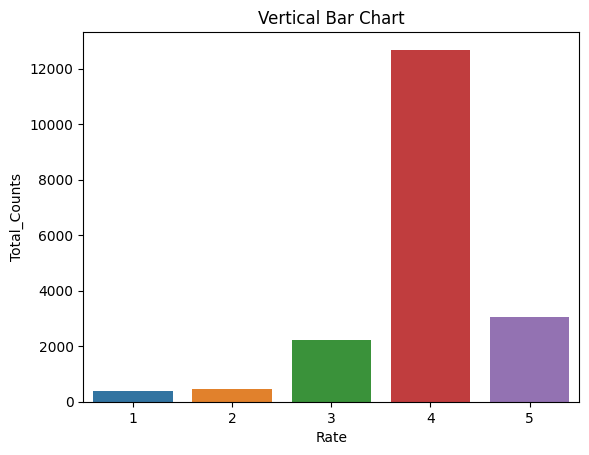

In [20]:
# Visualizing the Rate and Total_counts Using Bar Chart
a=rating_counts['Rate']
b=rating_counts['Total_Counts']
sns.barplot(x=a,y=b,orient='v')
plt.title("Vertical Bar Chart")
plt.show()

###    It's interesting that there are more people giving rating of  4 

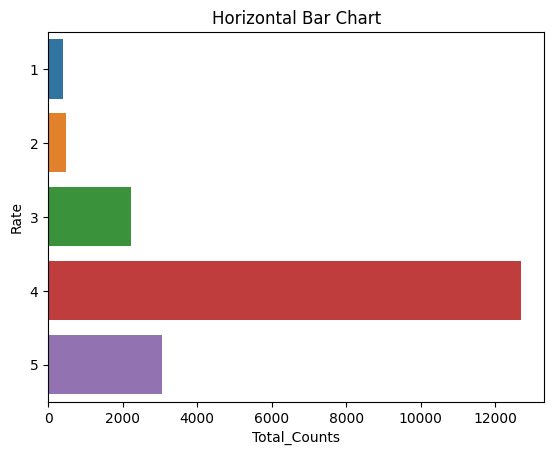

In [21]:
a=rating_counts['Rate']
b=rating_counts['Total_Counts']
sns.barplot(x=b,y=a,orient='h')
plt.title("Horizontal Bar Chart")
plt.show()

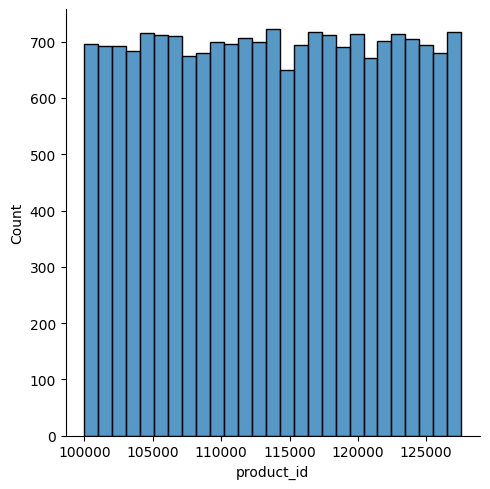

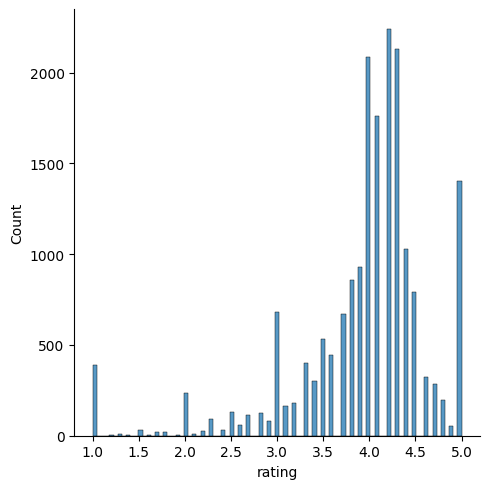

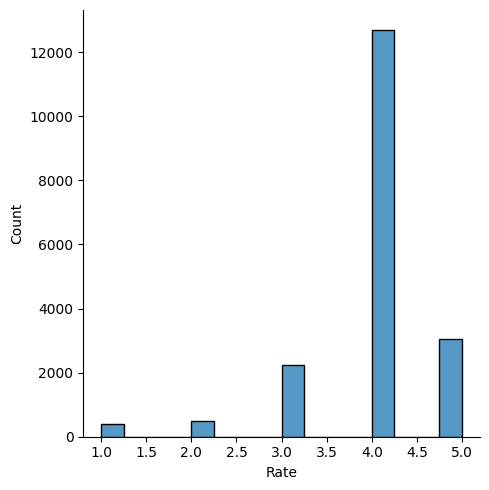

In [40]:
import seaborn as sn
# Let us understand the distribution of each attributes (product_id, rating, rate)

# Distribution of Product
sn.displot(data=cleaned, x="product_id", kind="hist", aspect=1)

# Distribution of rating
sn.displot(data=cleaned, x="rating", kind="hist", aspect=1)

# Distribution of Rate
sn.displot(data=cleaned, x="Rate", kind="hist", aspect=1)

In [23]:
cleaned.dtypes

Unnamed: 0        int64
product_id        int64
product_name     object
category         object
sale_price      float64
market_price    float64
user_id           int64
rating          float64
Rate              int64
dtype: object

# Building the 1st Model - Implemeting the Nearest Neighbor Model

## KNN model for item-based collaborative filtering
###  Reshaping the Dataset
##### For K-Nearest Neighbors, we want the data to be in an array, where each row is a product and each column is a different user. To reshape the dataframe, we'll pivot the dataframe to the wide format with product as rows and users as columns. Then we'll fill the missing observations with 0s since we're going to be performing linear algebra operations (calculating distances between vectors). Finally, we transform the values of the dataframe into a scipy sparse matrix for more efficient calculations.

In [24]:
#pivot table and create product-user matrix

product_mat = cleaned.pivot(index='product_id', columns='user_id', values='Rate').fillna(0)

In [25]:
product_mat.head()

user_id,2,8,9,12,14,16,17,19,20,22,...,278535,278554,278561,278633,278681,278723,278819,278832,278843,278851
product_id,,,,,,,,,,,,,,,,,,,,,
100001,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100002,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
product_mat.shape

(18840, 9739)

In [27]:
# create mapper from movie title to index

product_to_idx = {
    product: i for i, product in 
    enumerate(list(cleaned.set_index('product_id').loc[product_mat.index].product_name))
}

In [28]:
# importing sprase matrix from scipy library
# convert dataframe of Product features to scipy sparse matrix
from scipy.sparse import csr_matrix  

product_sparse = csr_matrix(product_mat.values)

In [29]:
product_sparse

<18840x9739 sparse matrix of type '<class 'numpy.float64'>'
	with 18840 stored elements in Compressed Sparse Row format>

### Fitting the Model

##### Time to implement the model. We’ll initialize the NearestNeighbors class as model_knn and fit our sparse matrix to the instance. By specifying the metric = cosine, the model will measure similarity bectween artist vectors by using cosine similarity.


In [30]:
#importing knn algorithm from sklearn library
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(product_sparse)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

### Here I use the fuzzywuzzy library to find the product name that is in dataset or not


In [31]:
#defining function
from fuzzywuzzy import fuzz

def fuzzy_matching(mapper, fav_product, verbose=True):
  
    match_tuple = []
    # get match
    for product_name, idx in mapper.items():
        ratio = fuzz.ratio(product_name.lower(), fav_product.lower())
        if ratio >= 60:
            match_tuple.append((product_name, idx, ratio))
    # sort
    match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
    if not match_tuple:
        print('Oops! No match is found')
        return
    if verbose:
        print('Found possible matches in our dataset: {0}\n'.format([x[0] for x in match_tuple]))
    return match_tuple[0][1]

## Here I write the function to recommend the product

In [32]:
def make_recommendation(model_knn, data, mapper, fav_product, n_recommendations):
   
    # fit
    model_knn.fit(data)
    # get input product index
    print('You have input product:', fav_product)
    idx = fuzzy_matching(mapper, fav_product, verbose=True)
    # inference
    print('Recommendation system start to make inference')
    print('......\n')
    distances, indices = model_knn.kneighbors(data[idx], n_neighbors=n_recommendations+1)
    # get list of raw idx of recommendations
    raw_recommends = \
        sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
    # get reverse mapper
    reverse_mapper = {v: k for k, v in mapper.items()}
    # print recommendations
    print('Recommendations for {}:'.format(fav_product))
    for i, (idx, dist) in enumerate(raw_recommends):
        print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))

## Here I specifically entering the product that I want and It goes to make_recommendation method and then it gives the recommendation 

In [33]:
# butter, rice, cookies, 
my_favorite = 'cookies'

make_recommendation(
    model_knn=model_knn,
    data=product_sparse,
    fav_product=my_favorite,
    mapper=product_to_idx,
    n_recommendations=4)

You have input product: cookies
Found possible matches in our dataset: ['Oat Cookies', 'Chia Cookies', 'Milk Cookies', 'Fruit Cookies', 'Cashew Cookies', 'Ginger Cookies', 'Cookies - Milk', 'Butter Cookies', 'Chocopie', 'Cookies & Crème', 'Brownie Cookies', 'Cooking Soda', 'Chocos', 'Assorted Cookies', 'Cookies - Ginger', 'Cookies - Butter', 'Cookies - Cashew', 'Dipped Cookie', 'Cooking Sheet']

Recommendation system start to make inference
......

Recommendations for cookies:
1: Peanut Rice Paper Sauce, with distance of 1.0
2: Bleach - Original, with distance of 1.0
3: Knife - Dicing, with distance of 0.0
4: Oat Cookies, with distance of 0.0


### Checking the Accuracy 

In [34]:
# calcuate total number of entries in the product-user matrix
num_entries = product_mat.shape[0] * product_mat.shape[1]
# calculate total number of entries with zero values
num_zeros = (product_mat==0).sum(axis=1).sum()
# calculate ratio of number of zeros to number of entries
ratio_zeros = num_zeros / num_entries
print('There is about {:.2%} of ratings in our data is missing'.format(ratio_zeros))

There is about 99.99% of ratings in our data is missing
